##### Which aspect of a flight best predicts a customers' overall rating of an airline?

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# we open the file for reading
fileObject1 = open("df_air.pickle",'rb')
fileObject2 = open("df_main.pickle",'rb')
fileObject3 = open("star.pickle",'rb')
fileObject4 = open("budget.pickle",'rb')

# load the object from the file into variables
df_air = pickle.load(fileObject1)  
df = pickle.load(fileObject2) 
star = pickle.load(fileObject3) 
budget = pickle.load(fileObject4) 

In [3]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
content = df['content']

# recommend = df['recommend']
rating_best_worst = df[(df.overall_rating==10) | (df.overall_rating==1)] 


X = rating_best_worst.content
y = rating_best_worst.overall_rating.astype('uint')

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
len(X_train), len(X_test)

(7827, 2609)

In [5]:
rating_best_worst.head().content

1     Two short hops ZRH-LJU and LJU-VIE. Very fast ...
9     Flights from LJU to ZRH and back all on time. ...
24    London Gatwick to Ljubljana and Ljubljana to V...
41    Flight to Larnaca was a joy. Generous legroom,...
53    2 flights - HER to ATH (short 50 minutes) and ...
Name: content, dtype: object

In [6]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [7]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(7827, 17682)

In [8]:
vect.get_feature_names()[-50:]

['yyz',
 'yzz',
 'zad',
 'zadar',
 'zag',
 'zagging',
 'zagreb',
 'zambia',
 'zante',
 'zanzibar',
 'zb',
 'zb38',
 'zb39',
 'zb439',
 'zb533',
 'zb534',
 'zb654',
 'zb655',
 'zb684',
 'zb685',
 'zb7414',
 'zb770',
 'zb771',
 'zbam',
 'zbje',
 'zealand',
 'zealanders',
 'zealands',
 'zero',
 'zeros',
 'zest',
 'zhengzhou',
 'zhr',
 'zig',
 'zih',
 'zim',
 'zimbabwe',
 'zip',
 'znz',
 'zonal',
 'zone',
 'zones',
 'zoo',
 'zqn',
 'zrh',
 'zubir',
 'zur',
 'zurich',
 'zyl',
 'zürich']

In [9]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(7827, 20513)

In [10]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(7827, 264598)

In [11]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes  to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.931391337677271


In [12]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [13]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  264598
Accuracy:  0.9421234189344576


In [14]:
# include 1-grams and 5-grams
vect = CountVectorizer(ngram_range=(1, 4))
tokenize_test(vect)

Features:  1604477
Accuracy:  0.9455730164814105


In [15]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  17384
Accuracy:  0.9421234189344576


In [16]:
# remove English stop words and only keep 1000 features
vect = CountVectorizer(stop_words='english', max_features=1000)
tokenize_test(vect)

Features:  1000
Accuracy:  0.9225756995017248


In [17]:
# include 1-grams and 2-grams, and limit the number of features to 1 mil.
vect = CountVectorizer(ngram_range=(1, 5), max_features=1000000)
tokenize_test(vect)

Features:  1000000
Accuracy:  0.947489459563051


In [18]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1,5), min_df=3)
tokenize_test(vect)

Features:  102729
Accuracy:  0.947489459563051


In [19]:
print(content[0])

Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.


In [20]:
# print the first review
rating_best_worst.content.values.astype('str')[11]

'Athens-Prague on 11 May. Online check-in was quick just had to get boarding passes and to drop off bags at the airport. Despite having a bus gate boarding was organised very well and the flight departed ahead of schedule. The seats were quite comfortable and legroom was acceptable for this short flight. There was a small hot meal of pasta on the flight as well as a small dessert and drinks. Sweets were distributed before the main meal service. The red wine served on board was very good. Of note are the cabin crew who were very friendly and went around their work with smiles on their faces - this is rare these days with most airlines. The entertainment consisted of short videos on Greek island destinations and was ok though there was no audio available. Arrival into Prague on time and bags were processed within 15 minutes after leaving the aircraft. All in all Aegean is a hidden gem of an airline - I had a very good experience with Aegean and I would be glad to fly them again when I ca

In [21]:
# save it as a TextBlob object
review = TextBlob(rating_best_worst.content.values.astype('str')[11])

In [22]:
# list the words
review.words

WordList(['Athens-Prague', 'on', '11', 'May', 'Online', 'check-in', 'was', 'quick', 'just', 'had', 'to', 'get', 'boarding', 'passes', 'and', 'to', 'drop', 'off', 'bags', 'at', 'the', 'airport', 'Despite', 'having', 'a', 'bus', 'gate', 'boarding', 'was', 'organised', 'very', 'well', 'and', 'the', 'flight', 'departed', 'ahead', 'of', 'schedule', 'The', 'seats', 'were', 'quite', 'comfortable', 'and', 'legroom', 'was', 'acceptable', 'for', 'this', 'short', 'flight', 'There', 'was', 'a', 'small', 'hot', 'meal', 'of', 'pasta', 'on', 'the', 'flight', 'as', 'well', 'as', 'a', 'small', 'dessert', 'and', 'drinks', 'Sweets', 'were', 'distributed', 'before', 'the', 'main', 'meal', 'service', 'The', 'red', 'wine', 'served', 'on', 'board', 'was', 'very', 'good', 'Of', 'note', 'are', 'the', 'cabin', 'crew', 'who', 'were', 'very', 'friendly', 'and', 'went', 'around', 'their', 'work', 'with', 'smiles', 'on', 'their', 'faces', 'this', 'is', 'rare', 'these', 'days', 'with', 'most', 'airlines', 'The', 'en

In [23]:
# list the sentences
review.sentences

[Sentence("Athens-Prague on 11 May."),
 Sentence("Online check-in was quick just had to get boarding passes and to drop off bags at the airport."),
 Sentence("Despite having a bus gate boarding was organised very well and the flight departed ahead of schedule."),
 Sentence("The seats were quite comfortable and legroom was acceptable for this short flight."),
 Sentence("There was a small hot meal of pasta on the flight as well as a small dessert and drinks."),
 Sentence("Sweets were distributed before the main meal service."),
 Sentence("The red wine served on board was very good."),
 Sentence("Of note are the cabin crew who were very friendly and went around their work with smiles on their faces - this is rare these days with most airlines."),
 Sentence("The entertainment consisted of short videos on Greek island destinations and was ok though there was no audio available."),
 Sentence("Arrival into Prague on time and bags were processed within 15 minutes after leaving the aircraft."),

In [24]:
# some string methods are available
review.lower()

TextBlob("athens-prague on 11 may. online check-in was quick just had to get boarding passes and to drop off bags at the airport. despite having a bus gate boarding was organised very well and the flight departed ahead of schedule. the seats were quite comfortable and legroom was acceptable for this short flight. there was a small hot meal of pasta on the flight as well as a small dessert and drinks. sweets were distributed before the main meal service. the red wine served on board was very good. of note are the cabin crew who were very friendly and went around their work with smiles on their faces - this is rare these days with most airlines. the entertainment consisted of short videos on greek island destinations and was ok though there was no audio available. arrival into prague on time and bags were processed within 15 minutes after leaving the aircraft. all in all aegean is a hidden gem of an airline - i had a very good experience with aegean and i would be glad to fly them again 

In [25]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print([stemmer.stem(word) for word in review.words])

['athens-pragu', 'on', '11', 'may', 'onlin', 'check-in', 'was', 'quick', 'just', 'had', 'to', 'get', 'board', 'pass', 'and', 'to', 'drop', 'off', 'bag', 'at', 'the', 'airport', 'despit', 'have', 'a', 'bus', 'gate', 'board', 'was', 'organis', 'veri', 'well', 'and', 'the', 'flight', 'depart', 'ahead', 'of', 'schedul', 'the', 'seat', 'were', 'quit', 'comfort', 'and', 'legroom', 'was', 'accept', 'for', 'this', 'short', 'flight', 'there', 'was', 'a', 'small', 'hot', 'meal', 'of', 'pasta', 'on', 'the', 'flight', 'as', 'well', 'as', 'a', 'small', 'dessert', 'and', 'drink', 'sweet', 'were', 'distribut', 'befor', 'the', 'main', 'meal', 'servic', 'the', 'red', 'wine', 'serv', 'on', 'board', 'was', 'veri', 'good', 'of', 'note', 'are', 'the', 'cabin', 'crew', 'who', 'were', 'veri', 'friend', 'and', 'went', 'around', 'their', 'work', 'with', 'smile', 'on', 'their', 'face', 'this', 'is', 'rare', 'these', 'day', 'with', 'most', 'airlin', 'the', 'entertain', 'consist', 'of', 'short', 'video', 'on', 'g

In [26]:
# assume every word is a noun
print([word.lemmatize() for word in review.words])

['Athens-Prague', 'on', '11', 'May', 'Online', 'check-in', 'wa', 'quick', 'just', 'had', 'to', 'get', 'boarding', 'pass', 'and', 'to', 'drop', 'off', 'bag', 'at', 'the', 'airport', 'Despite', 'having', 'a', 'bus', 'gate', 'boarding', 'wa', 'organised', 'very', 'well', 'and', 'the', 'flight', 'departed', 'ahead', 'of', 'schedule', 'The', 'seat', 'were', 'quite', 'comfortable', 'and', 'legroom', 'wa', 'acceptable', 'for', 'this', 'short', 'flight', 'There', 'wa', 'a', 'small', 'hot', 'meal', 'of', 'pasta', 'on', 'the', 'flight', 'a', 'well', 'a', 'a', 'small', 'dessert', 'and', 'drink', 'Sweets', 'were', 'distributed', 'before', 'the', 'main', 'meal', 'service', 'The', 'red', 'wine', 'served', 'on', 'board', 'wa', 'very', 'good', 'Of', 'note', 'are', 'the', 'cabin', 'crew', 'who', 'were', 'very', 'friendly', 'and', 'went', 'around', 'their', 'work', 'with', 'smile', 'on', 'their', 'face', 'this', 'is', 'rare', 'these', 'day', 'with', 'most', 'airline', 'The', 'entertainment', 'consisted'

In [27]:
# assume every word is a verb
print([word.lemmatize(pos='v') for word in review.words])

['Athens-Prague', 'on', '11', 'May', 'Online', 'check-in', 'be', 'quick', 'just', 'have', 'to', 'get', 'board', 'pass', 'and', 'to', 'drop', 'off', 'bag', 'at', 'the', 'airport', 'Despite', 'have', 'a', 'bus', 'gate', 'board', 'be', 'organise', 'very', 'well', 'and', 'the', 'flight', 'depart', 'ahead', 'of', 'schedule', 'The', 'seat', 'be', 'quite', 'comfortable', 'and', 'legroom', 'be', 'acceptable', 'for', 'this', 'short', 'flight', 'There', 'be', 'a', 'small', 'hot', 'meal', 'of', 'pasta', 'on', 'the', 'flight', 'as', 'well', 'as', 'a', 'small', 'dessert', 'and', 'drink', 'Sweets', 'be', 'distribute', 'before', 'the', 'main', 'meal', 'service', 'The', 'red', 'wine', 'serve', 'on', 'board', 'be', 'very', 'good', 'Of', 'note', 'be', 'the', 'cabin', 'crew', 'who', 'be', 'very', 'friendly', 'and', 'go', 'around', 'their', 'work', 'with', 'smile', 'on', 'their', 'face', 'this', 'be', 'rare', 'these', 'days', 'with', 'most', 'airlines', 'The', 'entertainment', 'consist', 'of', 'short', 'v

In [28]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [29]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  21976
Accuracy:  0.9352242238405519


In [30]:
# last 50 features
print(vect.get_feature_names()[-50:])

['£585', '£59', '£6', '£6.00', '£60', '£645', '£65', '£7', '£7.50', '£70', '£70.00', '£700', '£72', '£75', '£8', '£80', '£800', '£85', '£89', '£9', '£9.99', '£960', '£97', '££40', '½', '–', '–not', '–toronto', '‘', '’', '“', '”', '•traveling', '€1', '€10', '€100', '€109', '€1200', '€17.50', '€20', '€240', '€25', '€300', '€350', '€360', '€50', '€500', '€60', '€600', '€7']


In [31]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(df.content)
features = vect.get_feature_names()
dtm.shape

(38466, 34920)

In [32]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 302:
        review_id = np.random.randint(0, len(content))
        review_text = content[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # print 5 random words
    print('\n' + 'RANDOM WORDS:')
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # print the review
    print('\n' + review_text)

In [33]:
summarize()

TOP SCORING WORDS:
flight
travelled
business
class
paid

RANDOM WORDS:
transit
attentive
cz
recommend
thoroughly

Travelled AKL-CAN-LHR-CAN-AKL Business class. For what we paid absolutely no complaints. All CZ staff attentive and willing to please. Every flight was early. Can thoroughly recommend them. Sure their English isn't the best but they certainly try to accommodate you and nothing is too much trouble. Lounges all good. Transit in Guangzhou a breeze. Will fly with them again in the future.


In [34]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.28527777777777774

In [35]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [36]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
df['sentiment'] = df['content'].apply(detect_sentiment)

In [37]:
df_count = df.groupby('airline').count()

In [38]:
df_mean = df.groupby(['airline']).mean()

In [39]:
df_new = pd.concat([df_mean, df_count], axis=1)

In [40]:
df_new = df_new.iloc[:,4:15].reset_index()

In [41]:
df_new.rename(columns={'index':'airline','airline_name':'reviews_count'},inplace=True)

In [42]:
df_new = df_new[df_new['reviews_count'] > 300]
df_new.sort_values('sentiment',ascending=False).head()

,airline,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommend,overall,sentiment,reviews_count
153,garuda-indonesia,4.349432,4.477273,4.034091,3.781250,3.031250,3.011364,4.315341,0.911932,4.149858,0.279884,352
67,asiana-airlines,3.914191,4.267327,4.033003,3.372937,3.019802,3.013201,4.254125,0.861386,4.165017,0.260638,303
276,singapore-airlines,3.839907,4.357309,4.006961,4.041763,3.046404,2.997680,3.932715,0.816705,3.894432,0.247213,431
194,korean-air,3.819315,4.227414,3.595016,3.710280,3.012461,2.987539,4.028037,0.791277,3.988318,0.244656,321
142,eva-air,3.860927,4.023179,3.605960,3.612583,3.056291,3.013245,4.062914,0.831126,3.963576,0.238593,302


In [43]:
sentiment_10 = df_new.sort_values('sentiment',ascending=False).head(10)

In [44]:
# reviews with most positive sentiment
positive = df[df['sentiment']>0.8][['airline','content','sentiment']].sort_values(by='sentiment',ascending=False)

In [45]:
# reviews with most negative sentiment
negative = df[df['sentiment']<-0.6][['airline','content','sentiment']].sort_values(by='sentiment')

In [46]:
negative

,airline,content,sentiment
18086,flybe,Booked this morning for a flight from Leeds to...,-1.000000
38614,us-airways,Never ever use this airline. Took me two days ...,-1.000000
2364,air-canada-rouge,I was on rouge yesterday for a 5 hour flight f...,-1.000000
37938,turkish-airlines,Flew Jeddah-Istanbul-Dublin December 2013 and ...,-1.000000
3410,air-canada-rouge,Horrible. Paid for business class from Toronto...,-1.000000
33909,sunwing-airlines,Return trip Varedero to Winnipeg Sat March 7/S...,-1.000000
3952,air-india,Bangkok to Mumbai. We were travelling along wi...,-1.000000
32188,spirit-airlines,These people are terrible at being on time. Th...,-1.000000
28539,royal-air-maroc,Casablanca to Bologna 1 hour delay. Nobody apo...,-1.000000
25488,lufthansa,ORD-VCE LH 431 on March 18. Lufthansa Economy ...,-1.000000


-----

#### Frequent Words - Positive Review

In [47]:
# Use stop word from NLTK
nltk.download('stopwords')
nltk_stops = stopwords.words()

# Use stop word from SKLearn
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('flight')
custom_stop_words.append("flights")
custom_stop_words.append("fly")
custom_stop_words.append("flying")
custom_stop_words.append("flew")
custom_stop_words.append("airline")
custom_stop_words.append("airlines")
custom_stop_words.append("just")
custom_stop_words.append("did")
custom_stop_words.append("told")
custom_stop_words.append("excellent")
custom_stop_words.append("return")
custom_stop_words.append("2014")
custom_stop_words.append("class")
custom_stop_words.append("hour")
custom_stop_words.append("travelled")

# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)

# Use Positive Reviews First
X_pos = vectorizer.fit_transform(positive['content']) 

# Get counts of tokens.
docs = pd.DataFrame(X_pos.todense(), 
                    columns=vectorizer.get_feature_names())
postive_words = docs.sum().sort_values(ascending=False).head(20)
postive_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


good          38
service       28
food          18
time          17
great         17
crew          15
seat          13
staff         11
cabin         10
economy        9
experience     9
recommend      9
best           8
check          8
seats          6
drinks         6
room           6
board          6
plane          6
business       6
dtype: int64

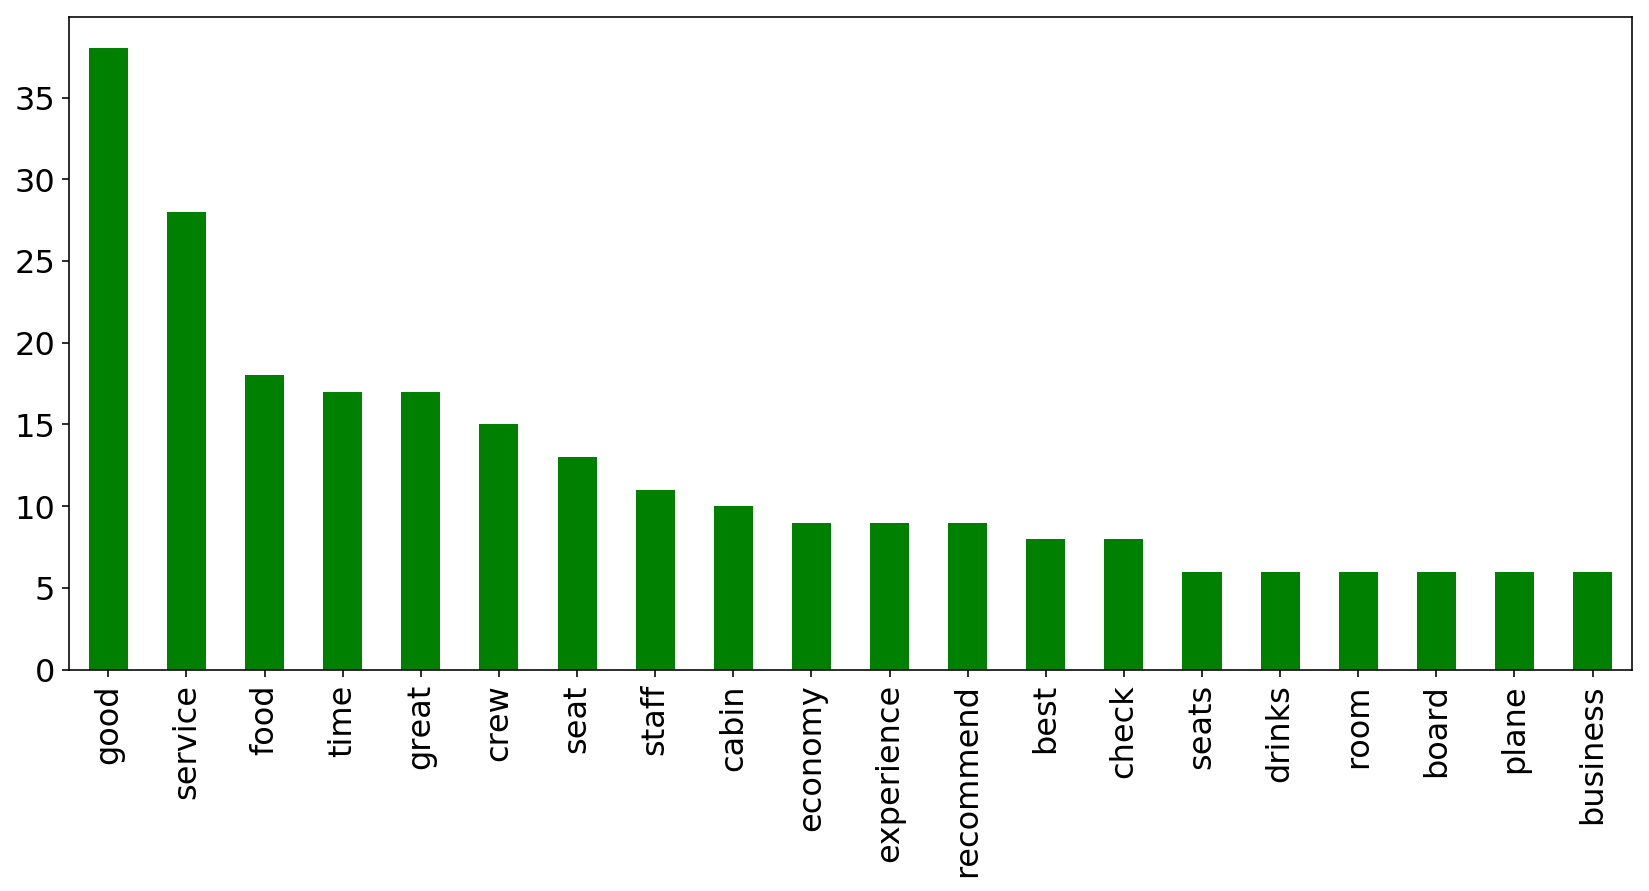

In [48]:
postive_words.plot(kind='bar',figsize=(14,6), color='g',fontsize=16)

-----

#### Frequent Words - Negative Review

In [49]:
# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X_neg = vectorizer.fit_transform(negative['content'])

# Get counts of tokens.
docs = pd.DataFrame(X_neg.todense(), 
                    columns=vectorizer.get_feature_names())
negative_words = docs.sum().sort_values(ascending=False).head(20)
negative_words

hours            18
service          17
worst            16
terrible         12
horrible         11
seats            10
delay             8
experience        8
business          8
delayed           8
airport           8
food              8
working           7
room              6
mumbai            6
entertainment     6
bangkok           6
passengers        5
plane             5
customer          5
dtype: int64

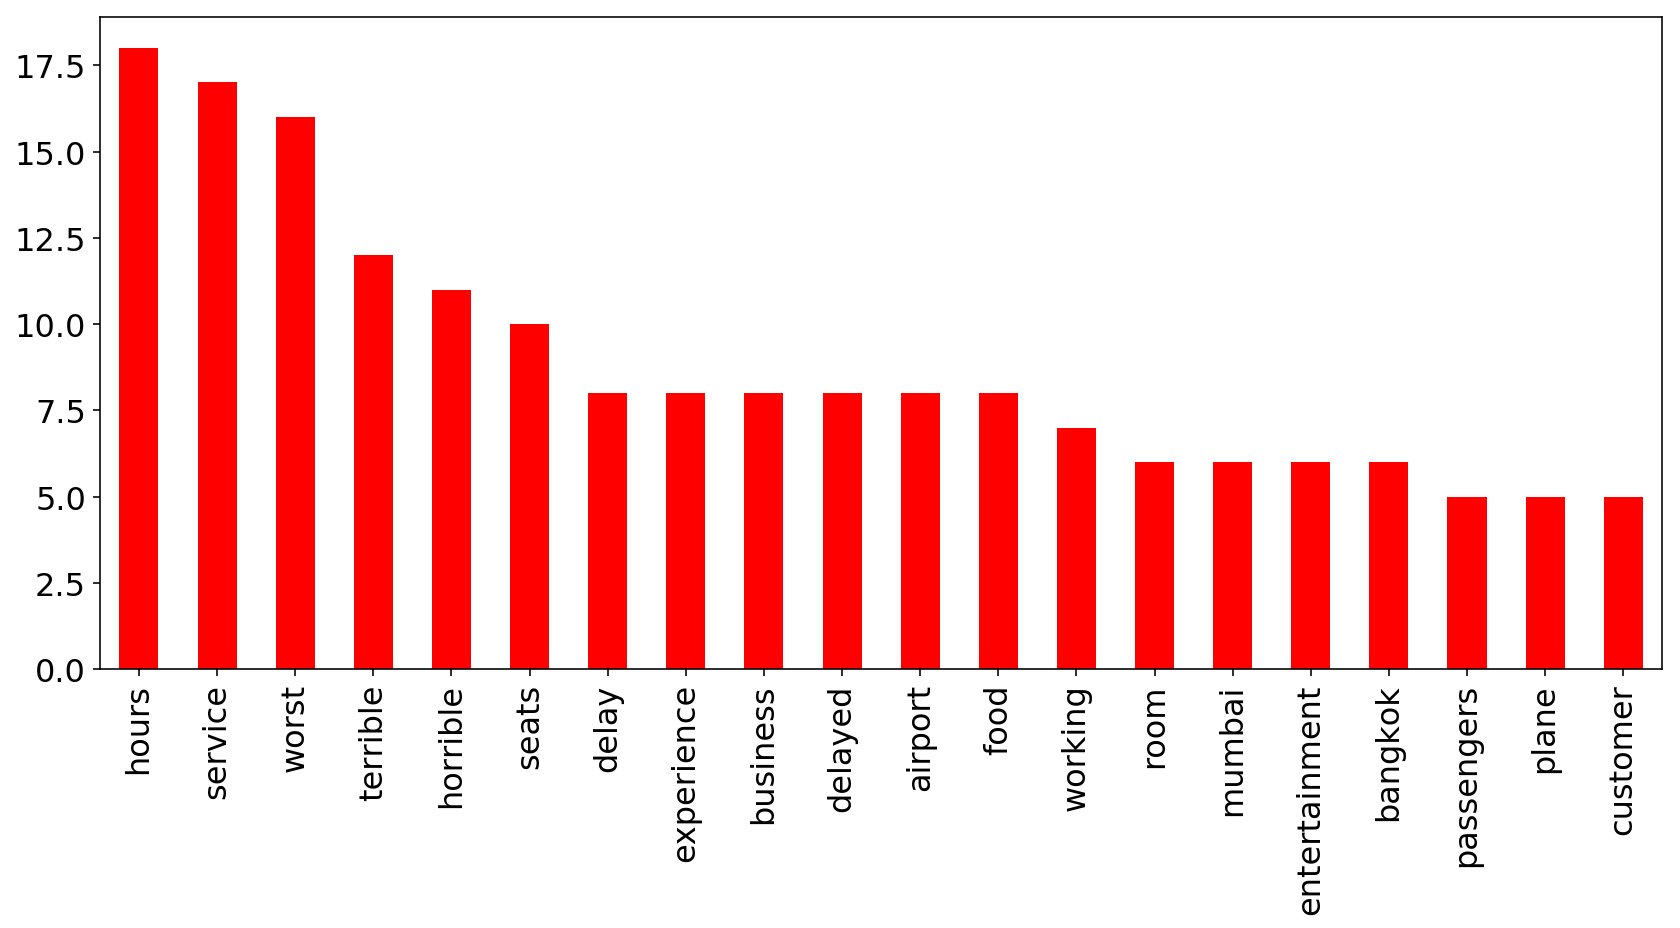

In [50]:
negative_words.plot(kind='bar',figsize=(14,6), color='r',fontsize=16)

-----

In [51]:
positive['content'].values

array(["SA528 26/3/14 Durban - Johannesburg. Excellent experience from check in to arrival. Can't fault them.",
       "Our plane made unscheduled stops in Armenia and The Czech Republic to refuel to and from Tehran without informing of this beforehand. My wife and I missed both connections on each leg of the trip not even an apology was given. Don't fly bmi to Tehran!",
       'Flew from Liverpool to Alicante. My husband requires assistance and the service we received was excellent. I would recommend easyjet.',
       'We travelled with Easyjet from Gatwick to Tenerife and were very happy with the service they provided. Also we booked the hotel through them and it was excellent. I would recommend EasyJet to anyone going away for a break to get some sunshine in Tenerife.',
       'LHR to Madrid in Club Europe. Excellent service and excellent lunch - just wish the seats were roomier for the price.',
       'BE405 2/8/13. Nightmare. 2 days to travel from Belfast to Milan. 8 hours stuck i

##### Top Ranking Airlines by Sentiment Analysis - from customer reviews

In [52]:
top_by_sentiment=df_new[['airline','sentiment','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',\
                             'inflight_entertainment_rating','value_money_rating','reviews_count','overall']].sort_values(by=['sentiment'],ascending=False)

In [53]:
top15_by_sentiment = df_new.groupby(['airline'])[['sentiment','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',\
                             'inflight_entertainment_rating','value_money_rating','reviews_count','overall']].mean().\
                              sort_values(by=['sentiment'],ascending=False).head(15)
top15_by_sentiment.reset_index(inplace=True)

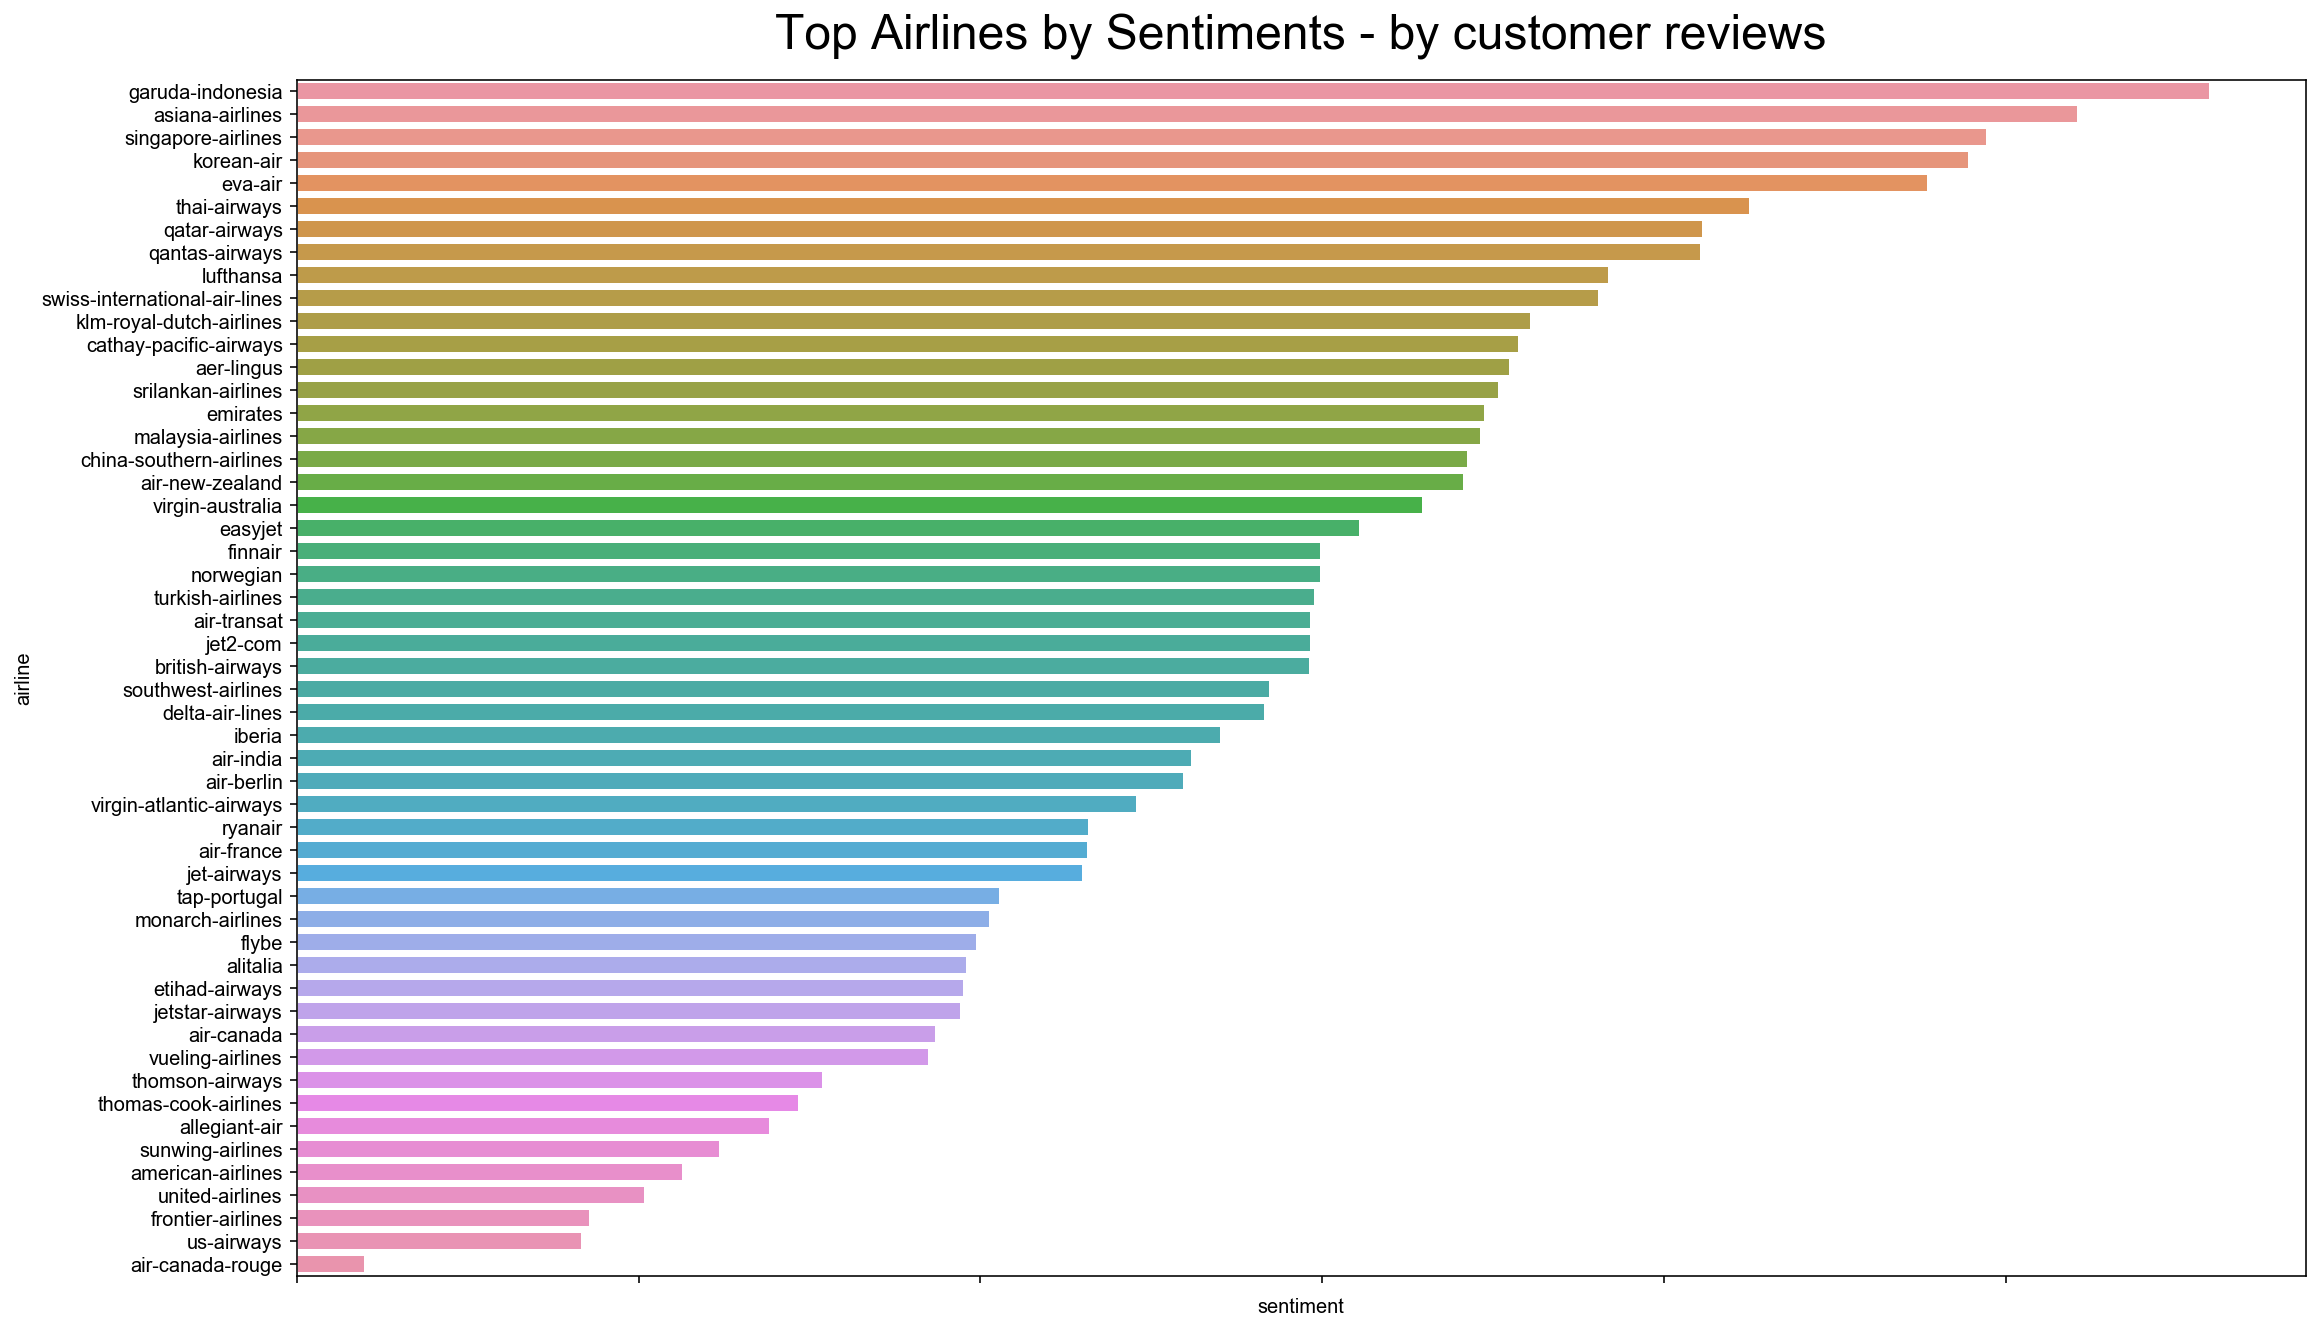

In [54]:
f, ax = plt.subplots(1,1,figsize=(18,11))
sns.set_color_codes("pastel")

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=85)
ax.set_title('Top Airlines by Sentiments - by customer reviews',fontdict={'fontsize':24},pad=15)

sns.set(style="whitegrid", palette="muted")
sns.barplot(x="sentiment", y="airline", data=top_by_sentiment)

----